# Compare samples using Smirnov, QQ-plot

In this example we are going to estimate whether two samples follow the same distribution using the Smirnov numerical test and the graphical QQ-plot test.

The smirnov test is based on the maximum distance between the cumulative distribution function.
If $F_{n_1}^{*}$ and $F_{n_2}^{*}$ are the empirical cumulative density functions of both samples of size $n_1$ and $n_2$, the Smirnov test evaluates the decision variable:

$$D^2 = \displaystyle \sqrt{\frac{n_1n_2}{n_1+n_2}} \sup_{x}|F_{n_1}^{*}(x) - F_{n_2}^{*}(x)|$$

which tends towards the Kolmogorov distribution. The hypothesis of same distribution is rejected if $D^2$ is too high (depending on the p-value threshold).

The QQ-plot graph plots empirical quantiles levels from two samples. If both samples correspond to the same probability distribution the curve should be close to the diagonal.



In [28]:
from __future__ import print_function
import openturns as ot

In [34]:
# Generate 3 samples, sample1 and sample2 arise from the same distribution
distribution1 = ot.Gumbel(5.5, 0.5)
distribution2 = ot.Uniform()

ot.RandomGenerator.SetSeed(5)
sample1 = distribution1.getSample(100)
sample2 = distribution1.getSample(100)
sample3 = distribution2.getSample(100)

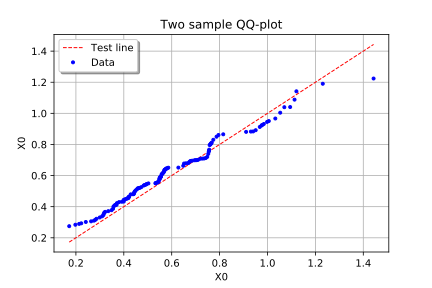

In [30]:
# Visually compare sample1 and sample2 using QQ-plot
ot.VisualTest.DrawQQplot(sample1, sample2)

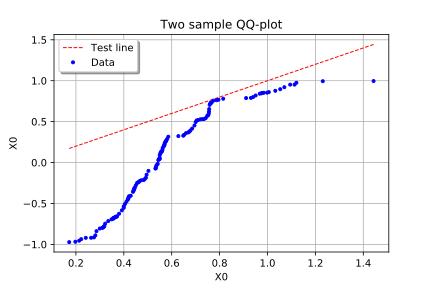

In [31]:
# Visually compare sample1 and sample3 using QQ-plot
ot.VisualTest.DrawQQplot(sample1, sample3)

In [32]:
# Numerically test sample1 against sample2
test_result = ot.HypothesisTest.Smirnov(sample1, sample2)
print('Samples follow the same distribution?', test_result.getBinaryQualityMeasure(),
      'p-value=%.6g' % test_result.getPValue(),
      'threshold=%.6g' % test_result.getThreshold())

Samples follow the same distribution? True p-value=0.210552 threshold=0.05


In [33]:
# Numerically test sample1 against sample3
test_result = ot.HypothesisTest.Smirnov(sample1, sample3)
print('Samples follow the same distribution?', test_result.getBinaryQualityMeasure(),
      'p-value=%.6g' % test_result.getPValue(),
      'threshold=%.6g' % test_result.getThreshold())

Samples follow the same distribution? False p-value=1.55431e-14 threshold=0.05
